크리스마스 관련 검색 키워드 추이 데이터

키워드 검색 트렌드 연도별 분석 중...


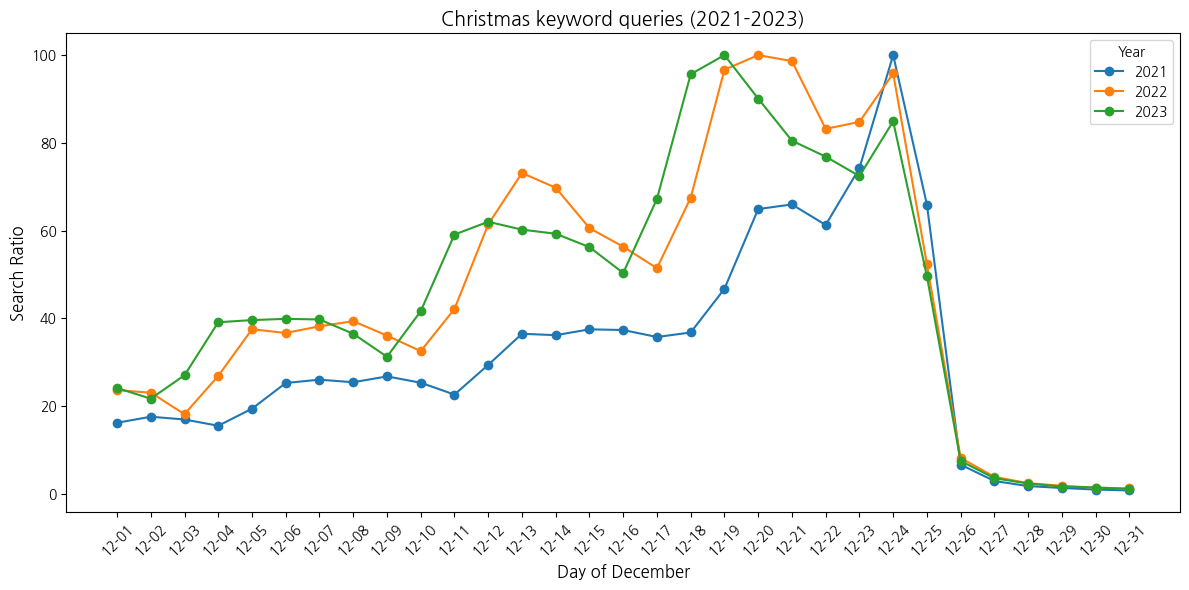

수집된 데이터:
      period     ratio    keyword  year day_of_month
0 2021-12-01  16.18579  christmas  2021        12-01
1 2021-12-02  17.56316  christmas  2021        12-02
2 2021-12-03  16.93574  christmas  2021        12-03
3 2021-12-04  15.50505  christmas  2021        12-04
4 2021-12-05  19.39890  christmas  2021        12-05


In [30]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # 날짜 포맷과 간격 조정을 위한 모듈

# 네이버 API 정보
CLIENT_ID = "uD_1kctG8tlAmJx1XoRX"  # 네이버 개발자 센터에서 발급받은 Client ID
CLIENT_SECRET = "4PZh2CBqA1"  # 네이버 개발자 센터에서 발급받은 Client Secret

# API 호출 함수
def get_trend_data(keywords, start_date, end_date, time_unit="date"):
    """
    네이버 데이터랩 API를 사용하여 여러 키워드의 검색 트렌드 데이터를 가져옵니다.
    """
    url = "https://openapi.naver.com/v1/datalab/search"
    headers = {
        "X-Naver-Client-Id": CLIENT_ID,
        "X-Naver-Client-Secret": CLIENT_SECRET
    }
    # 키워드 그룹 생성
    keyword_groups = [{"groupName": keyword, "keywords": [keyword]} for keyword in keywords]
    payload = {
        "startDate": start_date,
        "endDate": end_date,
        "timeUnit": time_unit,
        "keywordGroups": keyword_groups
    }

    response = requests.post(url, json=payload, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None

# 데이터 수집 및 시각화
def analyze_multiple_years_trend(keywords, new_names, date_ranges):
    all_data = []
    for year, (start_date, end_date) in date_ranges.items():
        data = get_trend_data(keywords, start_date, end_date)
        if data:
            for result, new_name in zip(data['results'], new_names):
                temp_df = pd.DataFrame(result['data'])
                temp_df['period'] = pd.to_datetime(temp_df['period'])
                temp_df['ratio'] = temp_df['ratio']
                temp_df['keyword'] = new_name
                temp_df['year'] = year
                all_data.append(temp_df)
        else:
            print(f"{year} 데이터 수집에 실패했습니다.")

    # 데이터 통합
    df = pd.concat(all_data, ignore_index=True)

    # 날짜를 연도에 관계없이 동일한 범위로 정렬 (12-10부터 12-31)
    df['day_of_month'] = df['period'].dt.strftime('%m-%d')

    # 시각화
    plt.figure(figsize=(12, 6))
    for year in df['year'].unique():
        year_data = df[df['year'] == year]
        plt.plot(year_data['day_of_month'], year_data['ratio'], marker='o', label=f"{year}")

    plt.title("Christmas keyword queries (2021-2023)", fontsize=14)
    plt.xlabel("Day of December", fontsize=12)
    plt.ylabel("Search Ratio", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Year")
    plt.tight_layout()
    plt.show()

    return df

# 실행 예제
if __name__ == "__main__":
    # 원래 키워드와 간소화된 이름 매핑
    keywords = ["크리스마스선물"]
    new_names = ["christmas"]  # 간소화된 이름

    # 연도별 날짜 범위
    date_ranges = {
        2021: ("2021-12-01", "2021-12-31"),
        2022: ("2022-12-01", "2022-12-31"),
        2023: ("2023-12-01", "2023-12-31")
    }

    print("키워드 검색 트렌드 연도별 분석 중...")
    df = analyze_multiple_years_trend(keywords, new_names, date_ranges)

    if not df.empty:
        print("수집된 데이터:")
        print(df.head())
    else:
        print("데이터 수집에 실패했습니다.")

연령 별 검색 데이터 (뷰티 카테고리 내 상품)

2021-12-01부터 2021-12-31까지 데이터 수집 중...


2021-12-01 ~ 2021-12-31 데이터 수집: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


2022-12-01부터 2022-12-31까지 데이터 수집 중...


2022-12-01 ~ 2022-12-31 데이터 수집: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


2023-12-01부터 2023-12-31까지 데이터 수집 중...


2023-12-01 ~ 2023-12-31 데이터 수집: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


총 1,790개의 데이터 수집 완료

=== 상위 10개 키워드 ===
   keyword       ratio
2     마스크팩  7701.96989
16   파운데이션  7679.47627
17    프라이머  7494.56133
13      크림  6502.00143
0      립스틱  5624.07985
10    아이크림  4686.38368
1     마스카라  4415.34391
12     컨실러  3995.29014
19   하이라이터  3645.56217
5      선크림  2907.64571

데이터가 'cosmetics_top_keywords.csv'에 저장되었습니다.


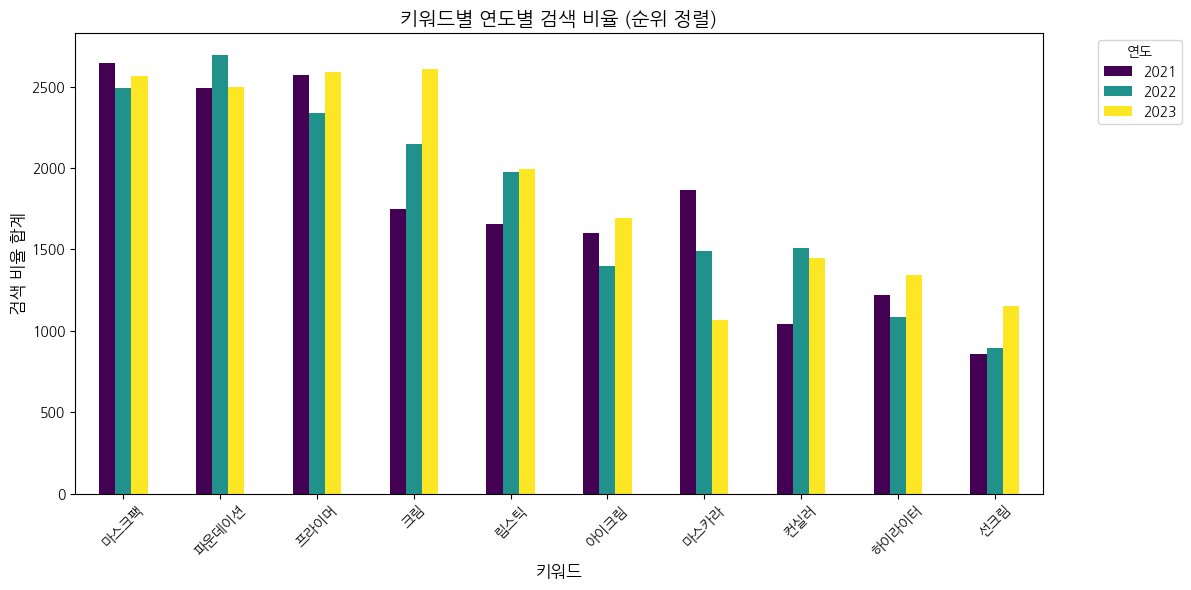

In [31]:
import requests
import pandas as pd
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트 자동 설정 라이브러리

# 네이버 API 정보
CLIENT_ID = "uD_1kctG8tlAmJx1XoRX"  # 네이버 개발자 센터에서 발급받은 Client ID
CLIENT_SECRET = "4PZh2CBqA1"  # 네이버 개발자 센터에서 발급받은 Client Secret
URL = "https://openapi.naver.com/v1/datalab/search"

# 화장품/미용 카테고리 관련 키워드 목록
keywords = [
    "스킨케어", "에센스", "토너", "세럼", "크림", "선크림", "클렌징폼", "마스크팩", "필링젤", "아이크림",
    "립스틱", "아이섀도우", "파운데이션", "컨실러", "블러셔", "브로우펜슬", "마스카라", "프라이머", "하이라이터", "셰이딩"
]

# 네이버 데이터랩 API 호출 함수
def fetch_keyword_trends(client_id, client_secret, url, keywords, start_date, end_date):
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret,
        "Content-Type": "application/json"
    }

    all_results = []

    # 키워드를 5개씩 분할
    for i in tqdm(range(0, len(keywords), 5), desc=f"{start_date} ~ {end_date} 데이터 수집"):
        keyword_subset = keywords[i:i+5]  # 5개씩 가져오기
        keyword_groups = [{"groupName": kw, "keywords": [kw]} for kw in keyword_subset]
        body = {
            "startDate": start_date,
            "endDate": end_date,
            "timeUnit": "date",
            "keywordGroups": keyword_groups
        }

        response = requests.post(url, headers=headers, json=body)

        if response.status_code == 200:
            data = response.json()
            for result in data["results"]:
                for datapoint in result["data"]:
                    all_results.append({
                        "keyword": result["title"],
                        "date": datapoint["period"],
                        "ratio": datapoint["ratio"],
                        "year": start_date[:4]  # 연도 추가
                    })
        else:
            print(f"API 요청 실패: 키워드 그룹 {keyword_subset}, 상태 코드: {response.status_code}, 오류 메시지: {response.text}")

        time.sleep(0.1)  # API 요청 제한 고려

    return pd.DataFrame(all_results)

# 상위 10개 키워드 추출 함수
def get_top_keywords(df, top_n=10):
    """
    상위 키워드를 추출합니다.
    """
    top_keywords = df.groupby(["keyword"])["ratio"].sum().reset_index()
    top_keywords = top_keywords.sort_values(by="ratio", ascending=False)
    return top_keywords.head(top_n)

def plot_keyword_bar_chart_sorted(full_data, top_keywords_list):
    """
    상위 10개 키워드의 검색 비율을 연도별로 막대그래프로 순위대로 정렬하여 시각화합니다.
    """
    # 상위 키워드 데이터 필터링
    filtered_data = full_data[full_data["keyword"].isin(top_keywords_list)]

    # 연도별, 키워드별 비율 합계 계산
    grouped_data = (
        filtered_data.groupby(["keyword", "year"])["ratio"]
        .sum()
        .unstack(fill_value=0)
    )

    # 검색 비율 총합으로 키워드 정렬
    grouped_data["total_ratio"] = grouped_data.sum(axis=1)
    grouped_data = grouped_data.sort_values(by="total_ratio", ascending=False)
    grouped_data = grouped_data.drop(columns=["total_ratio"])  # 정렬 후 total_ratio 열 제거

    # 막대그래프 생성
    grouped_data.plot(
        kind="bar",
        figsize=(12, 6),
        colormap="viridis"
    )

    plt.title("키워드별 연도별 검색 비율 (순위 정렬)", fontsize=14)
    plt.xlabel("키워드", fontsize=12)
    plt.ylabel("검색 비율 합계", fontsize=12)
    plt.legend(title="연도", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 실행 예제
if __name__ == "__main__":
    # 설정
    DATE_RANGES = [
        ("2021-12-01", "2021-12-31"),
        ("2022-12-01", "2022-12-31"),
        ("2023-12-01", "2023-12-31")
    ]

    all_data = []

    # 연도별 데이터 수집
    for start_date, end_date in DATE_RANGES:
        print(f"{start_date}부터 {end_date}까지 데이터 수집 중...")
        yearly_data = fetch_keyword_trends(
            CLIENT_ID, CLIENT_SECRET, URL, keywords, start_date, end_date
        )
        if not yearly_data.empty:
            all_data.append(yearly_data)

    # 모든 연도의 데이터를 병합
    if all_data:
        full_data = pd.concat(all_data, ignore_index=True)
        print(f"총 {len(full_data):,}개의 데이터 수집 완료")

        # 상위 10개 키워드 추출
        print("\n=== 상위 10개 키워드 ===")
        top_keywords = get_top_keywords(full_data, top_n=10)
        print(top_keywords)

        # 데이터 저장
        top_keywords.to_csv("cosmetics_top_keywords.csv", index=False, encoding="utf-8-sig")
        print("\n데이터가 'cosmetics_top_keywords.csv'에 저장되었습니다.")

        # 키워드별 연도 구분 막대그래프 (순위대로 정렬)
        plot_keyword_bar_chart_sorted(full_data, top_keywords["keyword"].tolist())
    else:
        print("데이터 수집에 실패했습니다.")

뷰티 키워드와 크리스마스 키워드와의 연관분석

2021-12-01 ~ 2021-12-31 뷰티 키워드 데이터 수집 중...


2021-12-01 ~ 2021-12-31 데이터 수집: 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]


2021-12-01 ~ 2021-12-31 크리스마스 키워드 데이터 수집 중...


2021-12-01 ~ 2021-12-31 데이터 수집: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


2022-12-01 ~ 2022-12-31 뷰티 키워드 데이터 수집 중...


2022-12-01 ~ 2022-12-31 데이터 수집: 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]


2022-12-01 ~ 2022-12-31 크리스마스 키워드 데이터 수집 중...


2022-12-01 ~ 2022-12-31 데이터 수집: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


2023-12-01 ~ 2023-12-31 뷰티 키워드 데이터 수집 중...


2023-12-01 ~ 2023-12-31 데이터 수집: 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]


2023-12-01 ~ 2023-12-31 크리스마스 키워드 데이터 수집 중...


2023-12-01 ~ 2023-12-31 데이터 수집: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


뷰티 키워드 데이터: 930개
크리스마스 키워드 데이터: 186개


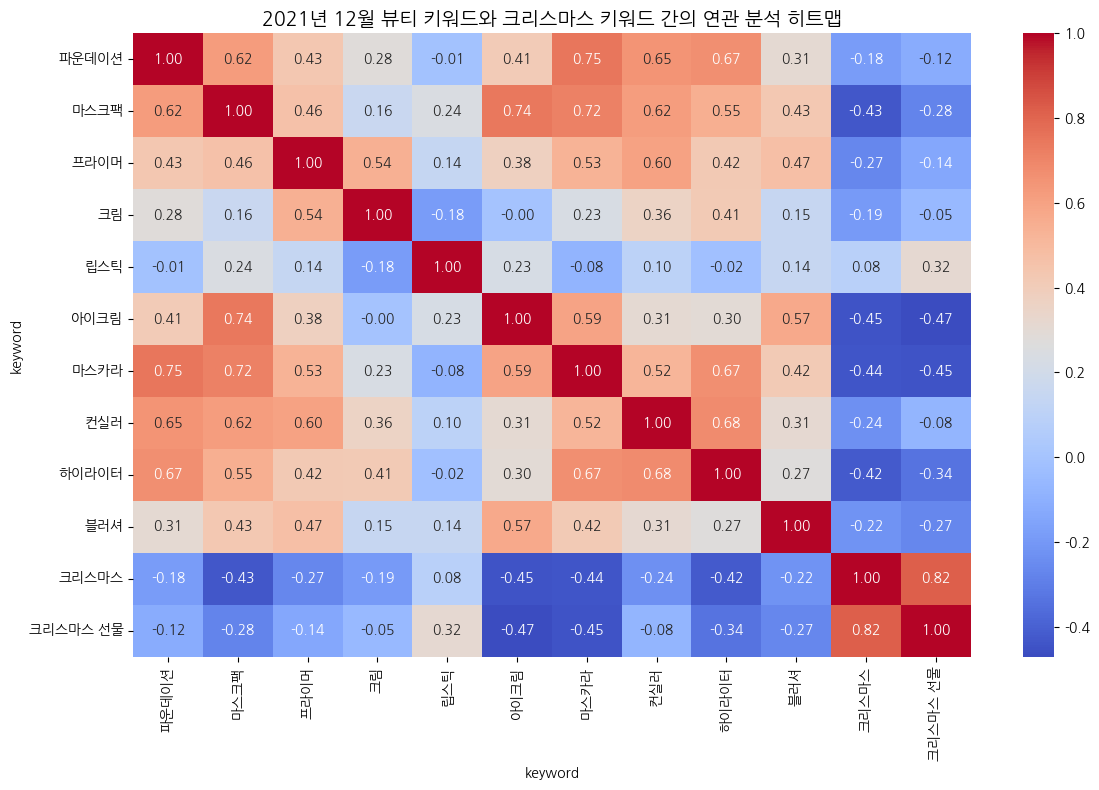

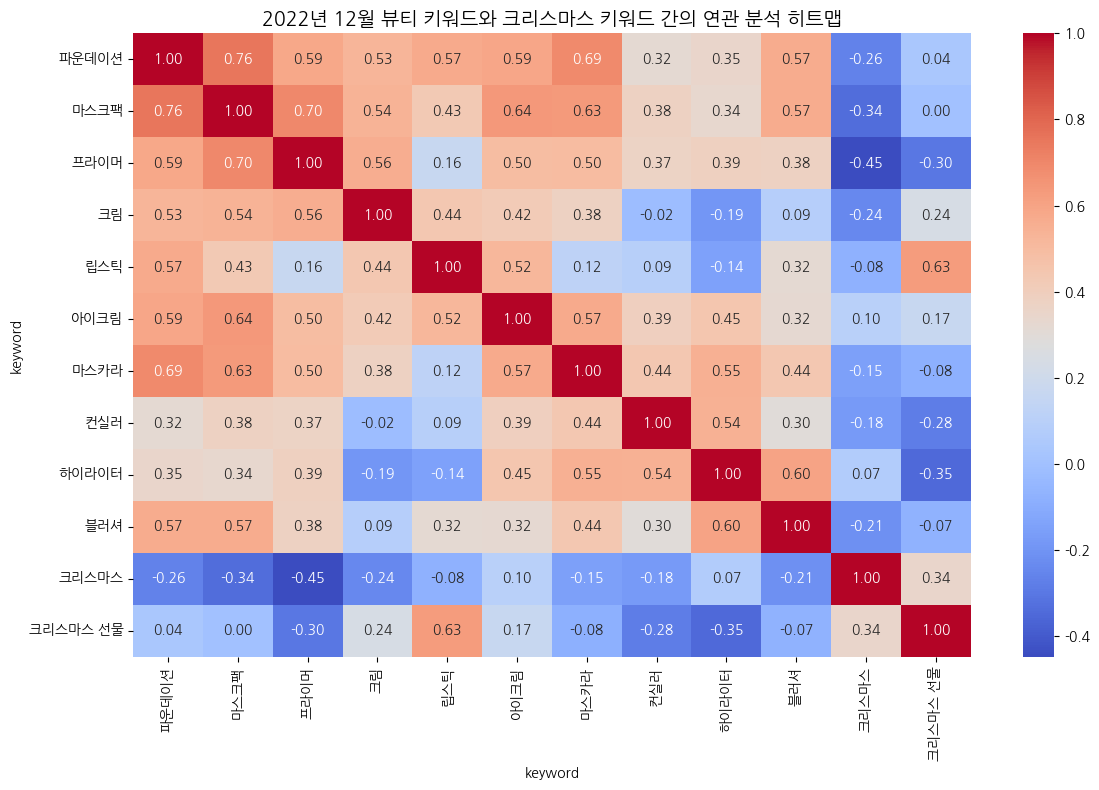

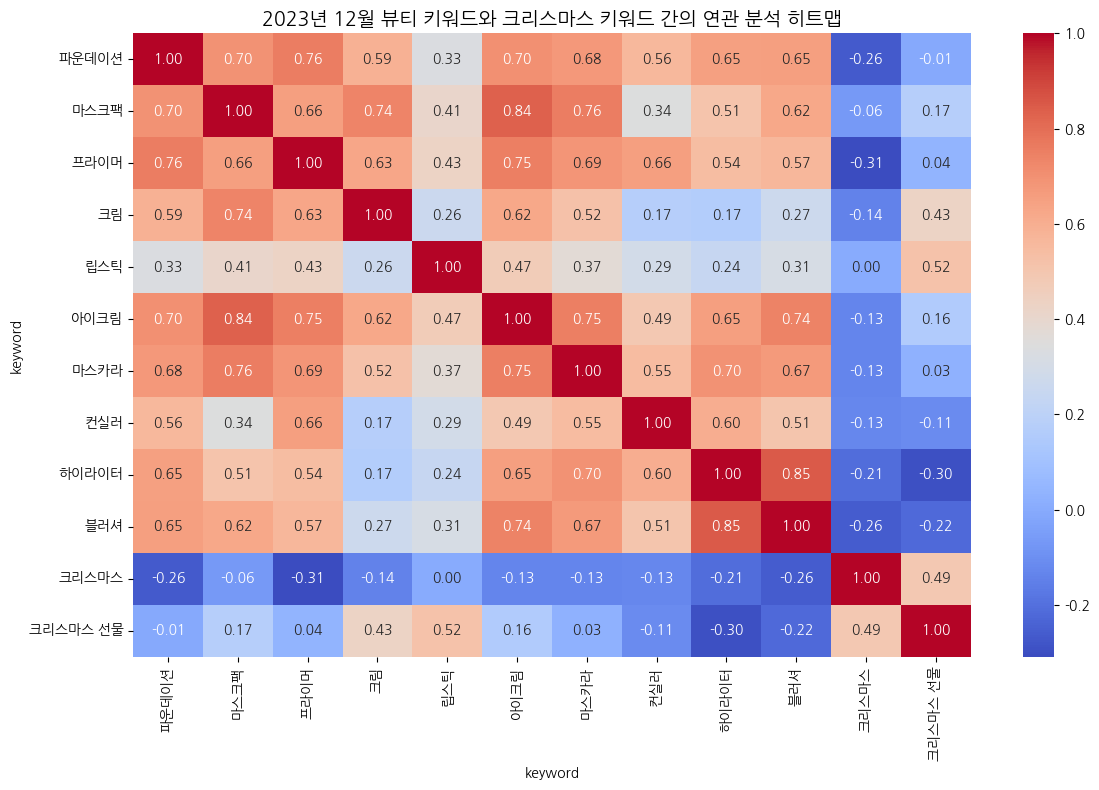

In [36]:
import requests
import pandas as pd
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib  # 한글 폰트 자동 설정 라이브러리

# 네이버 API 정보
CLIENT_ID = "uD_1kctG8tlAmJx1XoRX"  # 네이버 개발자 센터에서 발급받은 Client ID
CLIENT_SECRET = "4PZh2CBqA1"  # 네이버 개발자 센터에서 발급받은 Client Secret
URL = "https://openapi.naver.com/v1/datalab/search"

# 키워드 목록 (순서 중요)
beauty_keywords = [
    "파운데이션", "마스크팩", "프라이머", "크림", "립스틱",
    "아이크림", "마스카라", "컨실러", "하이라이터", "블러셔"
]
christmas_keywords = ["크리스마스", "크리스마스 선물"]

# 네이버 데이터랩 API 호출 함수
def fetch_keyword_trends(client_id, client_secret, url, keywords, start_date, end_date):
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret,
        "Content-Type": "application/json"
    }

    all_results = []

    # 키워드를 5개씩 분할
    for i in tqdm(range(0, len(keywords), 5), desc=f"{start_date} ~ {end_date} 데이터 수집"):
        keyword_subset = keywords[i:i+5]  # 5개씩 가져오기
        keyword_groups = [{"groupName": kw, "keywords": [kw]} for kw in keyword_subset]
        body = {
            "startDate": start_date,
            "endDate": end_date,
            "timeUnit": "date",
            "keywordGroups": keyword_groups
        }

        response = requests.post(url, headers=headers, json=body)

        if response.status_code == 200:
            data = response.json()
            for result in data["results"]:
                for datapoint in result["data"]:
                    all_results.append({
                        "keyword": result["title"],
                        "date": datapoint["period"],
                        "ratio": datapoint["ratio"],
                        "year": start_date[:4]  # 연도 추가
                    })
        else:
            print(f"API 요청 실패: 키워드 그룹 {keyword_subset}, 상태 코드: {response.status_code}, 오류 메시지: {response.text}")

        time.sleep(0.1)  # API 요청 제한 고려

    return pd.DataFrame(all_results)

# 히트맵 생성 함수
def plot_correlation_heatmap_by_year(data, year, ordered_keywords):
    """
    연도별 뷰티 키워드와 크리스마스 키워드 간의 연관 분석 히트맵을 생성합니다.
    """
    # 연도별 데이터 필터링
    yearly_data = data[data["year"] == year]

    # 데이터 피벗
    pivot_table = yearly_data.pivot_table(index="date", columns="keyword", values="ratio", aggfunc="sum")

    # 키워드 순서대로 정렬
    pivot_table = pivot_table[ordered_keywords]

    # 상관 계수 계산
    correlation_matrix = pivot_table.corr()

    # 히트맵 시각화
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"{year}년 12월 뷰티 키워드와 크리스마스 키워드 간의 연관 분석 히트맵", fontsize=14)
    plt.tight_layout()
    plt.show()

# 실행 예제
if __name__ == "__main__":
    # 설정
    DATE_RANGES = [
        ("2021-12-01", "2021-12-31"),
        ("2022-12-01", "2022-12-31"),
        ("2023-12-01", "2023-12-31")
    ]

    beauty_data = []
    christmas_data = []

    # 데이터 수집
    for start_date, end_date in DATE_RANGES:
        print(f"{start_date} ~ {end_date} 뷰티 키워드 데이터 수집 중...")
        yearly_beauty_data = fetch_keyword_trends(
            CLIENT_ID, CLIENT_SECRET, URL, beauty_keywords, start_date, end_date
        )
        beauty_data.append(yearly_beauty_data)

        print(f"{start_date} ~ {end_date} 크리스마스 키워드 데이터 수집 중...")
        yearly_christmas_data = fetch_keyword_trends(
            CLIENT_ID, CLIENT_SECRET, URL, christmas_keywords, start_date, end_date
        )
        christmas_data.append(yearly_christmas_data)

    # 데이터 병합
    if beauty_data and christmas_data:
        beauty_data = pd.concat(beauty_data, ignore_index=True)
        christmas_data = pd.concat(christmas_data, ignore_index=True)
        full_data = pd.concat([beauty_data, christmas_data], ignore_index=True)

        print(f"뷰티 키워드 데이터: {len(beauty_data):,}개")
        print(f"크리스마스 키워드 데이터: {len(christmas_data):,}개")

        # 연도별 히트맵 시각화
        ordered_keywords = beauty_keywords + christmas_keywords
        for year in ["2021", "2022", "2023"]:
            plot_correlation_heatmap_by_year(full_data, year, ordered_keywords)
    else:
        print("데이터 수집에 실패했습니다.")